## Project description
<br>
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
<br>
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
<br>
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.
<br>
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
<br>
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.
<br>
You should:

 - Learn to predict the probability of churn (for the upcoming month) for each customer
 - Draw up typical user portraits: select the most outstanding groups and describe their main features
 - Analyze the factors that impact churn most
 - Draw basic conclusions and develop recommendations on how to improve customer service:
        Identify target groups
        Suggest measures to cut churn
        Describe any other patterns you see with respect to interaction with customers
        
        
<br>


### Instructions for completing the project
**Step 1. Download the data**
<br>
Model Fitness provided you with CSV files containing data on churn for a given month and information on the month preceding it.
<br>
The dataset includes the following fields:
<br>

  **'Churn'** — the fact of churn for the month in question
  <br>
    Current dataset fields:
    <br>
        User data for the preceding month
        <br>
            **'gender'**
            <br>
            <br>
            **'Near_Location'** — whether the user lives or works in the neighborhood where the gym is located
            <br>
            <br>
            **'Partner'** — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
            <br>
            <br>
            **'Promo_friends'** — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
            <br>
            <br>
            **'Phone'** — whether the user provided their phone number
            <br>
            <br>
            **'Age'**
            <br>
            <br>
            **'Lifetime'** — the time (in months) since the customer first came to the gym
            <br>
            <br>
    Data from the log of visits and purchases and data on current membership status
    <br>
    <br>
        **'Contract_period'** — 1 month, 3 months, 6 months, or 1 year
        <br>
        <br>
        **'Month_to_end_contract'** — the months remaining until the contract expires
        <br>
        <br>
        **'Group_visits'** — whether the user takes part in group sessions
        <br>
        <br>
        **'Avg_class_frequency_total'** — average frequency of visits per week over the customer's lifetime
        <br>
        <br>
        **'Avg_class_frequency_current_month'** — average frequency of visits per week over the preceding month
        <br>
        <br>
        **'Avg_additional_charges_total'** — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.
        <br>
        <br>

**File path**: /datasets/gym_churn_us.csv. Download the dataset.
<br>
**Step 2. Carry out exploratory data analysis (EDA)**
<br>
Look at the dataset: does it contain any missing features?
<br>
Study the mean values and standard deviation (use the **describe()** method).
<br>
Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the **groupby()** method).
<br>
Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
<br>
Build a correlation matrix and display it.
<br>
<br>

**Step 3. Build a model to predict user churn**
<br>
Build a binary classification model for customers where the target feature is the user's leaving next month.
<br>

  - Divide the data into train and validation sets using the **train_test_split()** function.

  - Train the model on the train set with two methods:**logistic regression**, **random forest**.
<br>
Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
<br>

**Remember to indicate the random_state parameter when dividing data and defining the algorithm.**
<br>
<br>
**Step 4. Create user clusters**
<br>
Set aside the column with data on churn and identify object (user) clusters:
<br>

  **Standardize the data**.
<br>
    Use the **linkage()** function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.
 <br>**Note**: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
<br>
    Train the clustering model with the **K-means** algorithm and predict customer clusters.
<br>(Let the number of clusters be **n=5**, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
<br>
Look at the mean feature values for clusters. Does anything catch your eye?
<br>
 Plot distributions of features for the clusters. Do you notice anything?
 <br>
Calculate the churn rate for each cluster (use the **groupby()** method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?
<br>
<br>

**Step 5. Come up with conclusions and basic recommendations on working with customers**
<br>
Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
<br>
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

In [1]:
%pip install seaborn
%pip install plotly


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import time
from sklearn.inspection import permutation_importance

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

**Step 1. Download the data**

In [5]:
try:
    
    gym_churn = pd.read_csv('gym_churn_us.csv')
    
    
except:
    
    gym_churn = pd.read_csv('/datasets/gym_churn_us.csv')
    

**Step 2. Carry out exploratory data analysis (EDA)**

In [6]:
gym_churn.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

**There are No missing values.**

In [7]:
gym_churn.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [8]:
gym_churn.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [9]:
gym_churn["id"] = gym_churn.index+1

In [10]:
gym_churn.sample()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
1084       0              1        1              1      0               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
1084             0   23                    198.505331                   10.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
1084         8                   0.627617                           0.612831   

      Churn    id  
1084      0  1085

**Checking your DATA for duplicates**

In [11]:
gym_churn.duplicated().sum()

0

**We have no duplicates.**

**Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).**

In [12]:
gym_churn_grouped = gym_churn.groupby(['Churn'])['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month'].mean() 

In [13]:
gym_churn_grouped

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.027882  
1                               1.044546

**We can cee that our data is destrebuted ivenly by gender. We have about 50% of fimales and males**
<br>

**0 means that peaple stayed and 1 means that thay left(churnd)**
<br>

**83% peaple that stayed are from neighboorhood**
<br>

**53% of stayers signed up from partner companies and 35% have discount ginven by friends**
<br>

**90% of peaple that didnt give the phone number in both groups**
<br>

**Contract period of stayers is longer 5.7 than lefters 1.7**
<br>


**Plot bar histograms and feature distributions for those who left (churn) and those who stayed.**

In [14]:
gym_churn_stay = gym_churn.loc[gym_churn['Churn'] == 0]
gym_churn_left = gym_churn.loc[gym_churn['Churn'] == 1]

<AxesSubplot:xlabel='gender', ylabel='Density'>

<AxesSubplot:xlabel='gender', ylabel='Density'>

Text(0.5, 1.0, 'gender')

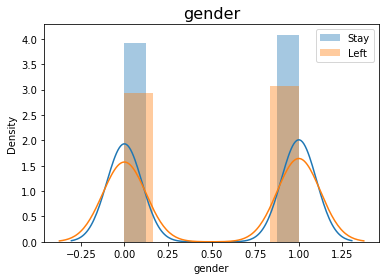

<AxesSubplot:xlabel='Near_Location', ylabel='Density'>

<AxesSubplot:xlabel='Near_Location', ylabel='Density'>

Text(0.5, 1.0, 'Near_Location')

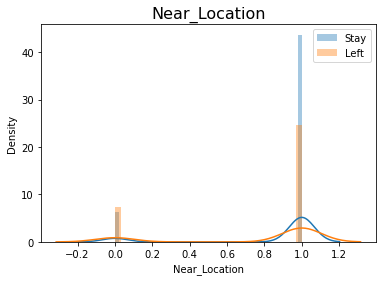

<AxesSubplot:xlabel='Partner', ylabel='Density'>

<AxesSubplot:xlabel='Partner', ylabel='Density'>

Text(0.5, 1.0, 'Partner')

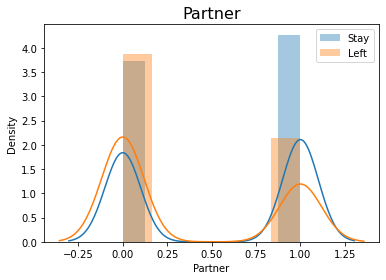

<AxesSubplot:xlabel='Promo_friends', ylabel='Density'>

<AxesSubplot:xlabel='Promo_friends', ylabel='Density'>

Text(0.5, 1.0, 'Promo_friends')

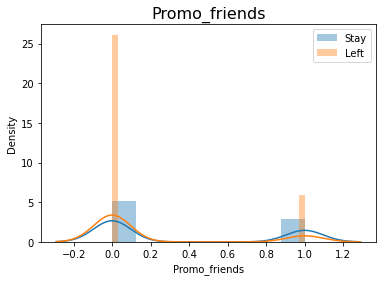

<AxesSubplot:xlabel='Phone', ylabel='Density'>

<AxesSubplot:xlabel='Phone', ylabel='Density'>

Text(0.5, 1.0, 'Phone')

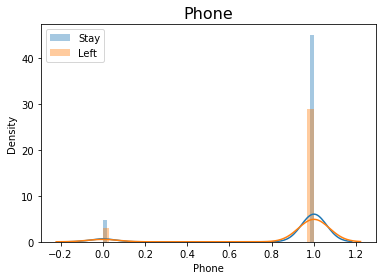

<AxesSubplot:xlabel='Contract_period', ylabel='Density'>

<AxesSubplot:xlabel='Contract_period', ylabel='Density'>

Text(0.5, 1.0, 'Contract_period')

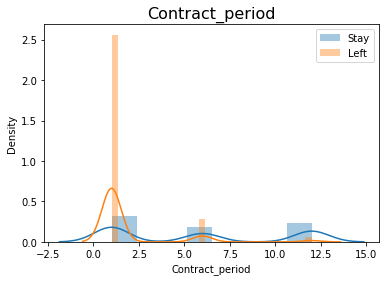

<AxesSubplot:xlabel='Group_visits', ylabel='Density'>

<AxesSubplot:xlabel='Group_visits', ylabel='Density'>

Text(0.5, 1.0, 'Group_visits')

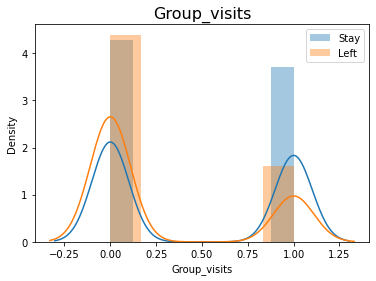

<AxesSubplot:xlabel='Age', ylabel='Density'>

<AxesSubplot:xlabel='Age', ylabel='Density'>

Text(0.5, 1.0, 'Age')

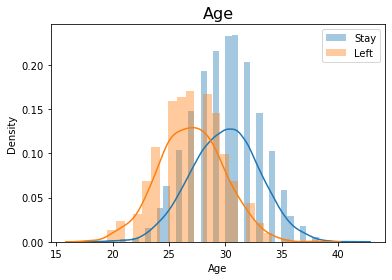

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

Text(0.5, 1.0, 'Avg_additional_charges_total')

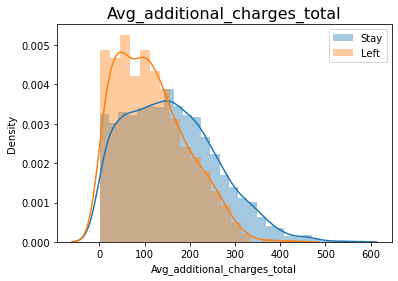

<AxesSubplot:xlabel='Month_to_end_contract', ylabel='Density'>

<AxesSubplot:xlabel='Month_to_end_contract', ylabel='Density'>

Text(0.5, 1.0, 'Month_to_end_contract')

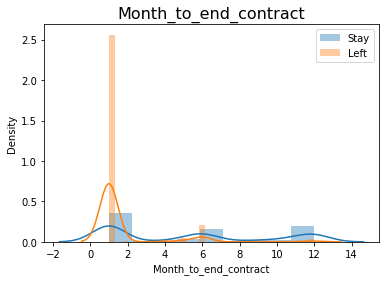

<AxesSubplot:xlabel='Lifetime', ylabel='Density'>

<AxesSubplot:xlabel='Lifetime', ylabel='Density'>

Text(0.5, 1.0, 'Lifetime')

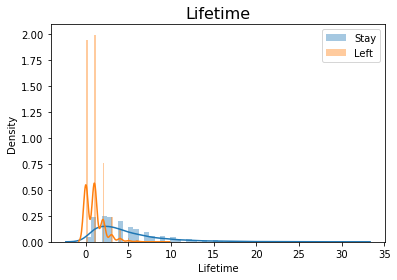

<AxesSubplot:xlabel='Avg_class_frequency_total', ylabel='Density'>

<AxesSubplot:xlabel='Avg_class_frequency_total', ylabel='Density'>

Text(0.5, 1.0, 'Avg_class_frequency_total')

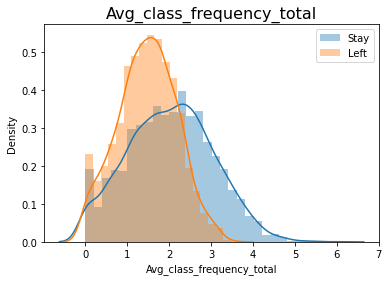

<AxesSubplot:xlabel='Avg_class_frequency_current_month', ylabel='Density'>

<AxesSubplot:xlabel='Avg_class_frequency_current_month', ylabel='Density'>

Text(0.5, 1.0, 'Avg_class_frequency_current_month')

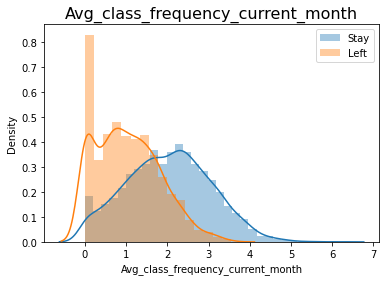

In [15]:
for col in gym_churn.drop('Churn',axis = 1).columns & gym_churn.drop('id',axis = 1).columns:
    sns.distplot(gym_churn_stay[col], label = 'Stay')
    sns.distplot(gym_churn_left[col], label = 'Left')
    plt.title(col, fontsize = 16)
    plt.legend()
    plt.show()
    

**Here we just visualised what we did in previous part!**

**We split the data for quitters and stayers and plotly distplot for every column.**
<br>
**We see nice normal distribution for ages around towards 30s**
<br>
**Genders are splitted almost evenly**
<br>
**Most customers that performed group visits are stayers**


**Build a correlation matrix and display it.**

In [16]:
cm = gym_churn.corr()
cm

gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.009156       0.062664  0.045561   
Churn                              0.000708      -0.128098 -0.157986   
id                                -0.006953       0.000537  0.009221   

                                   Promo_friends     Phone  Contract_period  \
gender                                 -0.005033 -0.008542         0.000502   
Near_Location                           0.210964 -0.015763         0.150233   
Partner                                 0.451960  0.009970         0.306166   
Promo_friends                           1.000000  0.001982         0.244552   
Phone                                   0.001982  1.000000        -0.006893   
Contract_period                         0.244552 -0.006893         1.000000   
Group_visits                            0.120170 -0.010099         0.169991   
Age                                     0.050113 -0.011403         0.138249   
Avg_additional_charges_total            0.036898  0.009279         0.111445   
Month_to_end_contract                   0.239553 -0.011196         0.973064   
Lifetime                                0.072721 -0.018801         0.170725   
Avg_class_frequency_total               0.028063  0.008340         0.096211   
Avg_class_frequency_current_month       0.053768  0.013375         0.159407   
Churn                                  -0.162233 -0.001177        -0.389984   
id                                     -0.013667  0.018369        -0.000614   

                                   Group_visits       Age  \
gender                                 0.017879  0.013807   
Near_Location                          0.154728  0.058358   
Partner                                0.022710  0.047480   
Promo_friends                          0.120170  0.050113   
Phone                                 -0.010099 -0.011403   
Contract_period                        0.169991  0.138249   
Group_visits                           1.000000  0.080934   
Age                                    0.080934  1.000000   
Avg_additional_charges_total           0.032079  0.080240   
Month_to_end_contract                  0.163703  0.134511   
Lifetime                               0.075853  0.164693   
Avg_class_frequency_total              0.056695  0.119953   
Avg_class_frequency_current_month      0.075923  0.183095   
Churn                                 -0.175325 -0.404735   
id                                     0.002677 -0.002527   

                                   Avg_additional_charges_total  \
gender                                                -0.009334   
Near_Location                                          0.040761   
Partner                                                0.022941   
Promo_friends                                          0.036898   
Phone                                                  0.009279   
Contract_period                                        0.111445   
Group_visits                                           0.032079   
Age                                                    0.080240   
Avg_additional_charges_total           

<AxesSubplot:>

(15.0, 0.0)

Text(0.5, 1.0, 'Corellation Matrix')

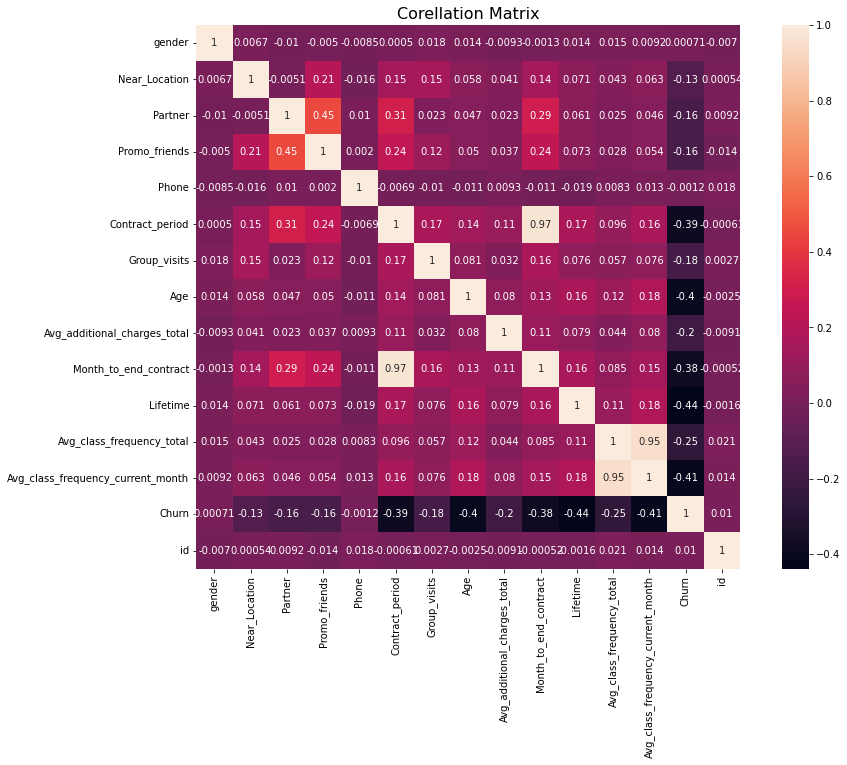

In [17]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm, annot=True, square = True)
ax.set_ylim(15,0)
plt.title('Corellation Matrix', fontsize = 16)
plt.show()

From corellation matrix we can cee that **Month_to_end_contract** highly correlated with **Contract_period**
<br>
And **Avg_class_frequency_total** highly correlated with **Avg_class_frequency_current_month**

To prevent errors in following steps we decided to drop **Avg_class_frequency_total** and **Contract_period**

In [18]:
gym_churn_new = gym_churn.drop(['Avg_class_frequency_total', 'Contract_period'],axis = 1)
gym_churn_new.head()

gender  Near_Location  Partner  Promo_friends  Phone  Group_visits  Age  \
0       1              1        1              1      0             1   29   
1       0              1        0              0      1             1   31   
2       0              1        1              0      1             0   28   
3       0              1        1              1      1             1   33   
4       1              1        1              1      1             0   26   

   Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
0                     14.227470                    5.0         3   
1                    113.202938                   12.0         7   
2                    129.448479                    1.0         2   
3                     62.669863                   12.0         2   
4                    198.362265                    1.0         3   

   Avg_class_frequency_current_month  Churn  id  
0                           0.000000      0   1  
1                           1.910244      0   2  
2                           1.736502      0   3  
3                           3.357215      0   4  
4                           1.120078      0   5

**In this part we can cee that:**
<br>
**Gender is distributed evenly btween mails and fimails.**
<br>
**We have more stayers than quitters.**
<br>
**Stayers have longer lifetime.**
<br>

 
    

**Step 3. Build a model to predict user churn**


Build a binary classification model for customers where the target feature is the user's leaving next month.
<br>

  - Divide the data into train and validation sets using the **train_test_split()** function.

  - Train the model on the train set with two methods:**logistic regression**, **random forest**.
<br>
Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
<br>

**Remember to indicate the random_state parameter when dividing data and defining the algorithm.**

**Divide the data into train and validation sets using the train_test_split() function.**

In [19]:
X = gym_churn_new.drop('Churn', axis = 1)
y = gym_churn_new['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

**Train the model on the train set with two methods:logistic regression, random forest.**

**Logistic Regression**

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions#52388406

In [22]:
model_1 = LogisticRegression(random_state=0, solver = 'newton-cg')
model_1.fit(X ,y)


LogisticRegression(random_state=0, solver='newton-cg')

In [23]:
predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)[:,1]

In [24]:
def mape(y_test, y_pred):
    y_error = y_test - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_test
    mape = (perc_error_abs.sum() / len(y_test))
    return mape

In [25]:
def print_all_metrics(y_true, y_pred, y_proba, title='Classification metrics:'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    print('\tMAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f}'.format(mean_absolute_error(y_true, y_pred),\
                                                                mean_squared_error(y_true, y_pred),\
                                                                mape(y_true, y_pred),\
                                                                r2_score(y_true, y_pred)))
    

**Metrics are made with predict:**

In [26]:
print_all_metrics(y_test, predictions_1, probabilities_1)
print()

Classification metrics:
	Accuracy: 0.91
	Precision: 0.80
	Recall: 0.82
	F1: 0.81
	ROC_AUC: 0.96
	MAE:0.10 MSE:0.10 MAPE:inf R2:0.49



**Metrics are made with custom threshold:**

**Treshold = amount of users with churn = 1 / amount of users with churn = 0**

In [27]:
threshold = 0.361


In [28]:
custom_predictions = [0 if i < threshold else 1 for i in probabilities_1]
print_all_metrics(y_test, custom_predictions, probabilities_1)
print()

Classification metrics:
	Accuracy: 0.90
	Precision: 0.76
	Recall: 0.87
	F1: 0.81
	ROC_AUC: 0.96
	MAE:0.10 MSE:0.10 MAPE:inf R2:0.46



In [29]:
weight_0 = model_1.intercept_
feature_weights = model_1.coef_
print('weight_0',weight_0)
print()
print('feature_weights',feature_weights)

weight_0 [15.9546038]

feature_weights [[ 7.42260638e-02 -1.99979430e-01 -1.71834646e-01 -4.47094933e-01
  -2.48205944e-01 -8.13295184e-01 -3.65251236e-01 -5.87201408e-03
  -3.30714894e-01 -1.04164072e+00 -1.23944479e+00  2.04385857e-05]]


**We can cee that our prediction with custom threshold is more balanced and prefered.**

**Random forest:**

In [30]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

RandomForestClassifier(random_state=0)

In [31]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.90
	Precision: 0.82
	Recall: 0.76
	F1: 0.79
	ROC_AUC: 0.95
	MAE:0.10 MSE:0.10 MAPE:inf R2:0.45


In [32]:
feature_weights_2 = rf_model.feature_importances_
print('Feature Importances', feature_weights_2)

Feature Importances [0.01344178 0.01056096 0.01331891 0.01380578 0.00756414 0.01832342
 0.12827134 0.10137443 0.11438935 0.30554279 0.19752526 0.07588184]


**Now we ready to do our comparisons.**

**Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?**

**Accuracy:Random forest 0.9  LR 0.90/0.91
<br>
Precision: Random forest 0.82  LR 0.80/0.76
<br>
Recall: Random forest 0.76 LR 0.87/0.82**



**Accuracy is about the same, Precision is bigger in LR and Recall is much bigger in LR**
<br>
**Based on this matrics we can say that Logistic Regression is our leading model!**

**Feature importance based on mean decrease in impurity:**

**Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.**

In [33]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


<AxesSubplot:>

Text(0.5, 1.0, 'Feature importances using MDI')

Text(0, 0.5, 'Mean decrease in impurity')

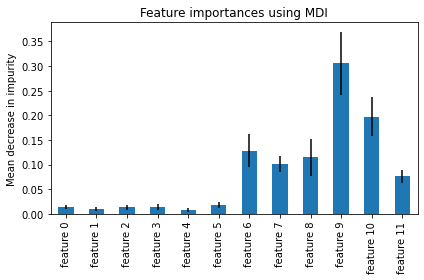

In [35]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**The  features 6, 9 and 10 are found important**

**Feature importance based on feature permutation:**

**Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.**

In [36]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.630 seconds


<AxesSubplot:>

Text(0.5, 1.0, 'Feature importances using permutation on full model')

Text(0, 0.5, 'Mean accuracy decrease')

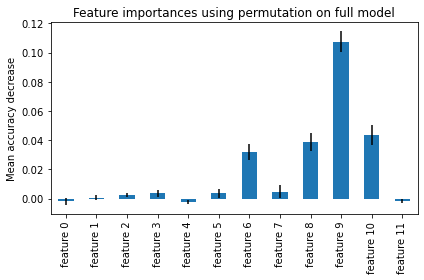

In [37]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

**The  features 6, 8,9 and 10 are found important**

**Almos the same features are detected as most important using both methods.**

**Step 4. Create user clusters**

**Set aside the column with data on churn and identify object (user) clusters:**

**Standardize the data**.

In [38]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [39]:
print(x_sc[:3])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  1.19403206
  -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.67847198 -1.73161785]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.19403206
   0.55732732 -0.35021325  1.83194105  0.87368001  0.1360137  -1.73075182]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.83749845
  -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02901851 -1.7298858 ]]


**Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.**

In [40]:
linked = linkage(x_sc, method='ward')

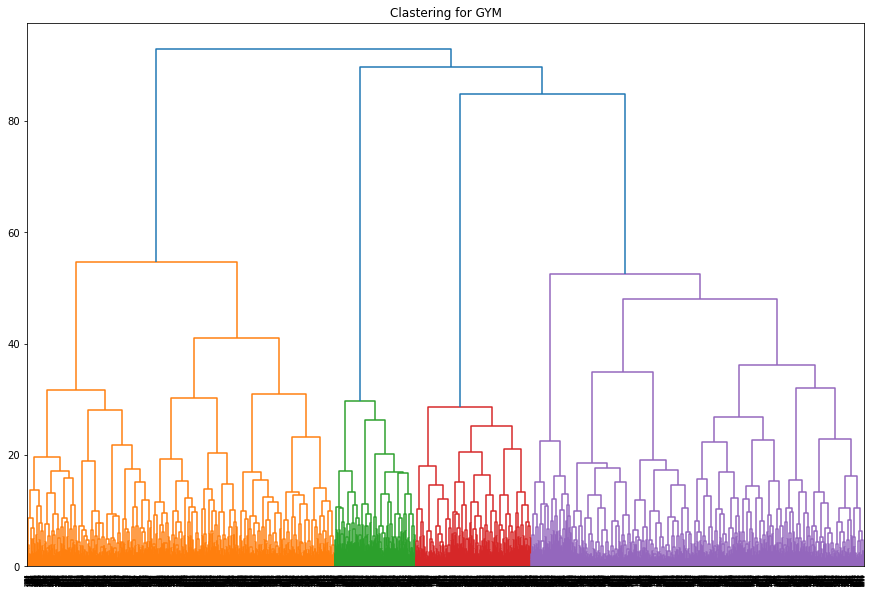

In [41]:

plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Clastering for GYM')
plt.show();

**We created 4 clusters!**

**Train the clustering model with the K-means algorithm and predict customer clusters.**

**Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.**

In [42]:
def show_clasters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(10,10))
    sns.scutterplot(df['x_name'],df['y_name'], hue = df['cluster_name'],palette='Paired')
    plt.title('{} VS {}'.format('x_name','y_name'))
    plt.show()
    

In [43]:
km = KMeans(n_clusters = 5,random_state=0)
lables = km.fit_predict(x_sc)
gym_churn_new['cluster_num'] = lables
gym_churn_new.head()

gender  Near_Location  Partner  Promo_friends  Phone  Group_visits  Age  \
0       1              1        1              1      0             1   29   
1       0              1        0              0      1             1   31   
2       0              1        1              0      1             0   28   
3       0              1        1              1      1             1   33   
4       1              1        1              1      1             0   26   

   Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
0                     14.227470                    5.0         3   
1                    113.202938                   12.0         7   
2                    129.448479                    1.0         2   
3                     62.669863                   12.0         2   
4                    198.362265                    1.0         3   

   Avg_class_frequency_current_month  Churn  id  cluster_num  
0                           0.000000      0   1            3  
1                           1.910244      0   2            1  
2                           1.736502      0   3            2  
3                           3.357215      0   4            3  
4                           1.120078      0   5            3

**We used n=5 and got cluster numbers assigned**

**The mean feature values for clusters**

In [44]:
gym_churn_grp = gym_churn_new.groupby('cluster_num').mean()
gym_churn_grp

gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_num                                                               
0            0.500821       0.000000  0.487685       0.075534  0.912972   
1            0.524931       0.991690  0.461219       0.027701  0.901662   
2            0.000000       1.000000  0.217005       0.072335  0.902284   
3            0.500477       0.996187  0.924690       1.000000  0.900858   
4            1.000000       1.000000  0.211538       0.074519  0.902644   

             Group_visits        Age  Avg_additional_charges_total  \
cluster_num                                                          
0                0.228243  28.673235                    136.777043   
1                0.570637  30.630194                    186.546003   
2                0.331218  28.521574                    127.303984   
3                0.525262  29.604385                    153.225335   
4                0.343750  28.401442                    130.700195   

             Month_to_end_contract  Lifetime  \
cluster_num                                    
0                         2.807882  2.968801   
1                         7.367036  6.605263   
2                         2.187817  2.474619   
3                         6.474738  4.191611   
4                         2.098558  2.373798   

             Avg_class_frequency_current_month     Churn           id  
cluster_num                                                            
0                                     1.596024  0.403941  1999.001642  
1                                     2.385066  0.005540  1986.380886  
2                                     1.411008  0.416244  2022.697970  
3                                     1.912086  0.122021  1962.494757  
4                                     1.510286  0.426683  2040.742788

**Near_Location:** cluster 2 and 4 (peaple that live far avey)
<br>
**Partner:** cluster 3(a lot of people working in partner company)
<br>
**Promo_friends** cluster 3(a lot of people using promo code)

**Plot distributions of features for the clusters.**

In [45]:
cat_vars = gym_churn_new[['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits','Churn','cluster_num']].copy()
num_vars = gym_churn_new[['Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_current_month','cluster_num']].copy()

**We split our data to numerical and categorical groups.**

**Numeric features:**

In [46]:
for i in num_vars.columns:
    px.box(x=num_vars['cluster_num'], y=num_vars[i], title = i)

In [47]:
for i in num_vars.columns:
    px.histogram(num_vars,x=i, color ='cluster_num',title= i, barmode = 'overlay')

**Categorical features:**

In [48]:
for i in cat_vars.columns:
    px.histogram(cat_vars,x='cluster_num', color = i, title = i)

**From our investigation we can cee that C0 is most unlikely to charn, than C4 and C2 and then C3**

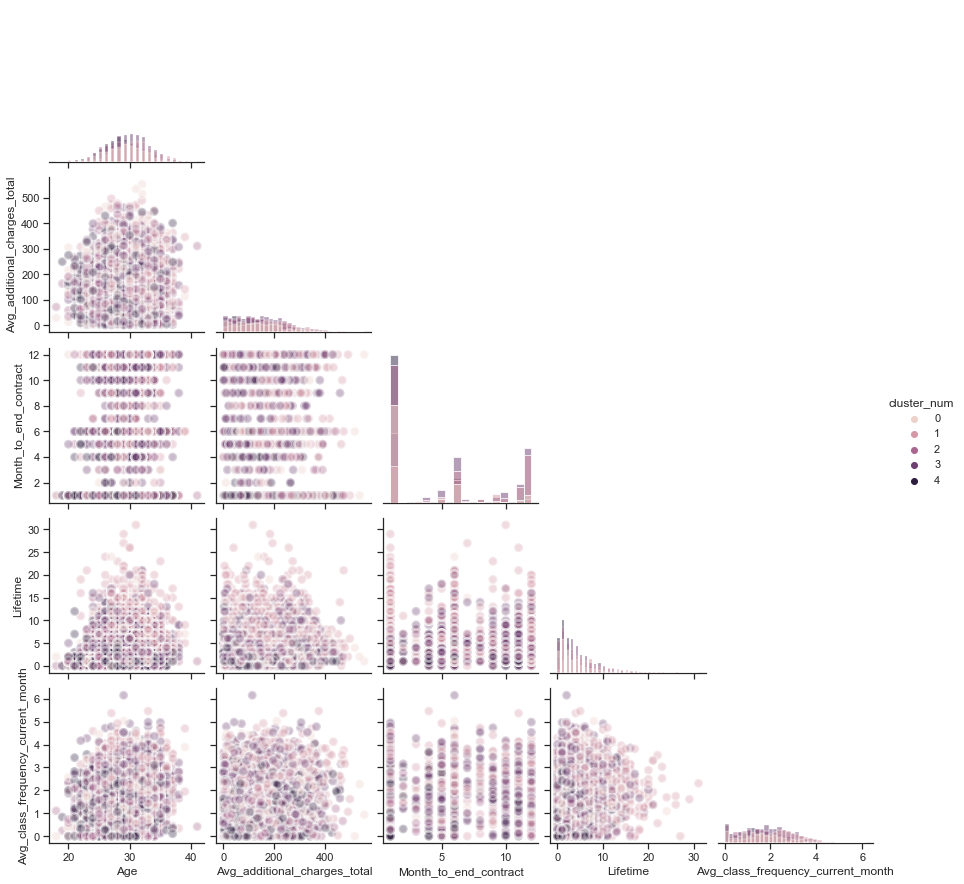

In [49]:
sns.set(style='ticks',color_codes=True)
gyms = sns.pairplot(num_vars, hue='cluster_num', diag_kind= 'hist', corner=True, plot_kws = dict(s=80, edgecolor="white",linewidth = 2.5, alpha=0.35))
plt.show()

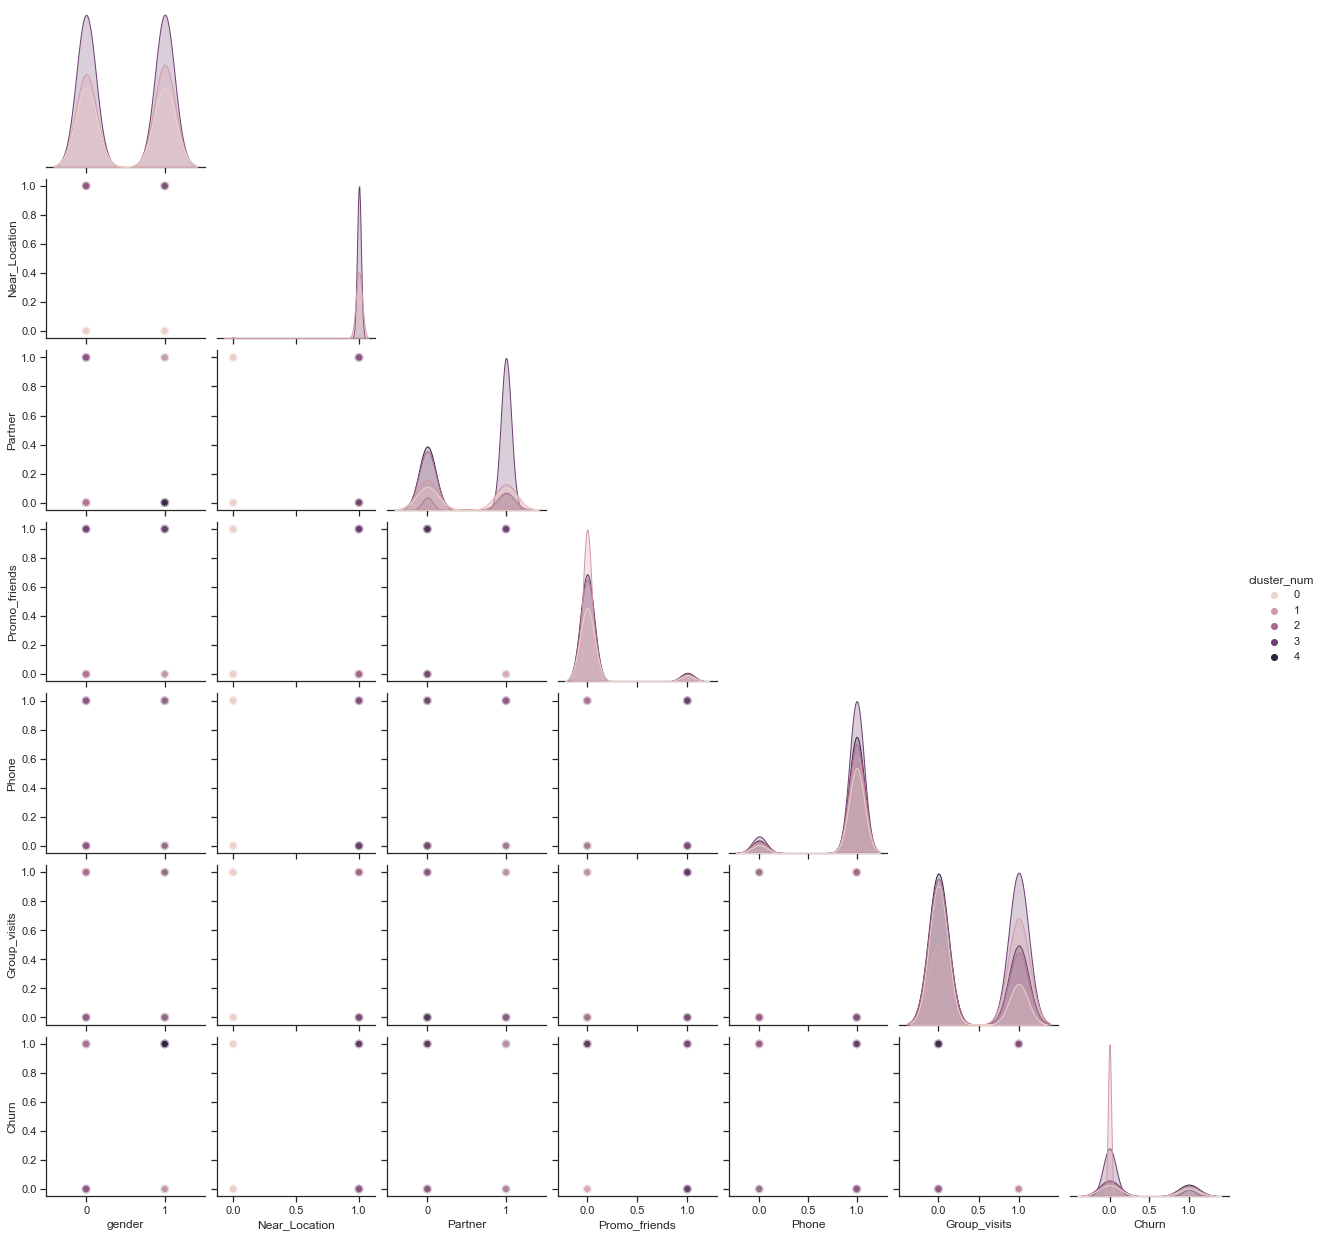

In [50]:
sns.set(style='ticks',color_codes=True)
gyms = sns.pairplot(cat_vars, hue='cluster_num', diag_kind= 'kde', corner=True, plot_kws = dict(s=80, edgecolor="white",linewidth = 2.5, alpha=0.35))
plt.show()

<AxesSubplot:xlabel='gender', ylabel='Density'>

<AxesSubplot:xlabel='gender', ylabel='Density'>

<AxesSubplot:xlabel='gender', ylabel='Density'>

<AxesSubplot:xlabel='gender', ylabel='Density'>

Text(0.5, 1.0, 'gender')

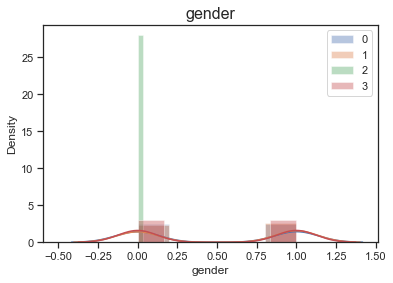

<AxesSubplot:xlabel='Near_Location', ylabel='Density'>

<AxesSubplot:xlabel='Near_Location', ylabel='Density'>

<AxesSubplot:xlabel='Near_Location', ylabel='Density'>

<AxesSubplot:xlabel='Near_Location', ylabel='Density'>

Text(0.5, 1.0, 'Near_Location')

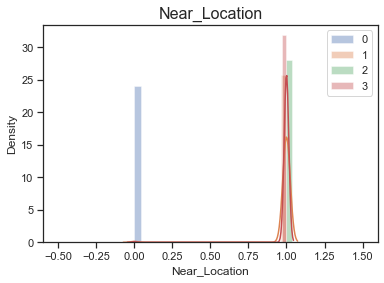

<AxesSubplot:xlabel='Partner', ylabel='Density'>

<AxesSubplot:xlabel='Partner', ylabel='Density'>

<AxesSubplot:xlabel='Partner', ylabel='Density'>

<AxesSubplot:xlabel='Partner', ylabel='Density'>

Text(0.5, 1.0, 'Partner')

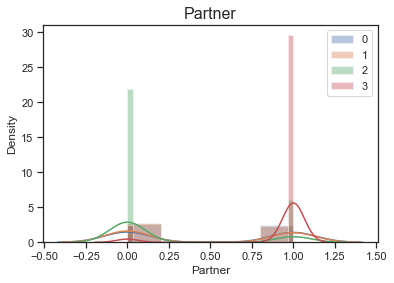

<AxesSubplot:xlabel='Promo_friends', ylabel='Density'>

<AxesSubplot:xlabel='Promo_friends', ylabel='Density'>

<AxesSubplot:xlabel='Promo_friends', ylabel='Density'>

<AxesSubplot:xlabel='Promo_friends', ylabel='Density'>

Text(0.5, 1.0, 'Promo_friends')

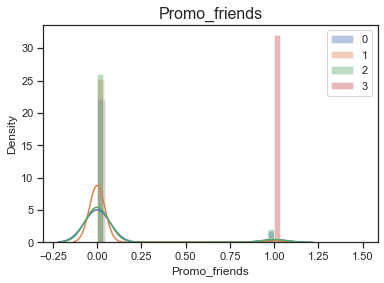

<AxesSubplot:xlabel='Phone', ylabel='Density'>

<AxesSubplot:xlabel='Phone', ylabel='Density'>

<AxesSubplot:xlabel='Phone', ylabel='Density'>

<AxesSubplot:xlabel='Phone', ylabel='Density'>

Text(0.5, 1.0, 'Phone')

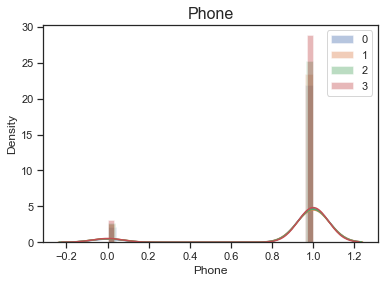

<AxesSubplot:xlabel='Group_visits', ylabel='Density'>

<AxesSubplot:xlabel='Group_visits', ylabel='Density'>

<AxesSubplot:xlabel='Group_visits', ylabel='Density'>

<AxesSubplot:xlabel='Group_visits', ylabel='Density'>

Text(0.5, 1.0, 'Group_visits')

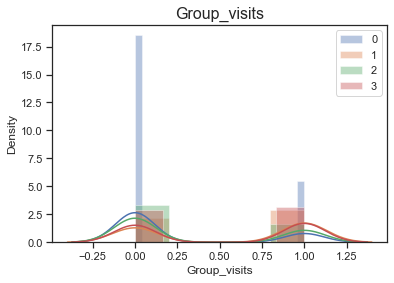

<AxesSubplot:xlabel='Age', ylabel='Density'>

<AxesSubplot:xlabel='Age', ylabel='Density'>

<AxesSubplot:xlabel='Age', ylabel='Density'>

<AxesSubplot:xlabel='Age', ylabel='Density'>

Text(0.5, 1.0, 'Age')

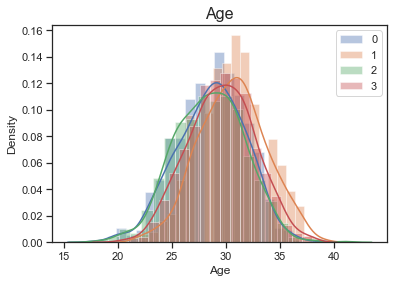

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

Text(0.5, 1.0, 'Avg_additional_charges_total')

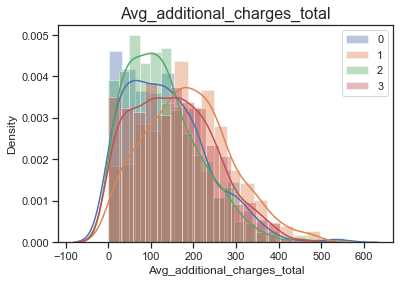

<AxesSubplot:xlabel='Month_to_end_contract', ylabel='Density'>

<AxesSubplot:xlabel='Month_to_end_contract', ylabel='Density'>

<AxesSubplot:xlabel='Month_to_end_contract', ylabel='Density'>

<AxesSubplot:xlabel='Month_to_end_contract', ylabel='Density'>

Text(0.5, 1.0, 'Month_to_end_contract')

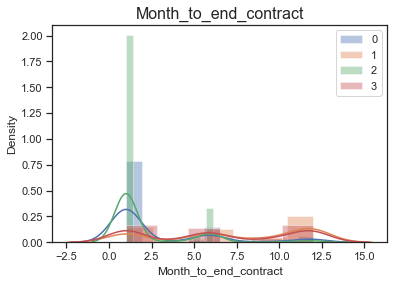

<AxesSubplot:xlabel='Lifetime', ylabel='Density'>

<AxesSubplot:xlabel='Lifetime', ylabel='Density'>

<AxesSubplot:xlabel='Lifetime', ylabel='Density'>

<AxesSubplot:xlabel='Lifetime', ylabel='Density'>

Text(0.5, 1.0, 'Lifetime')

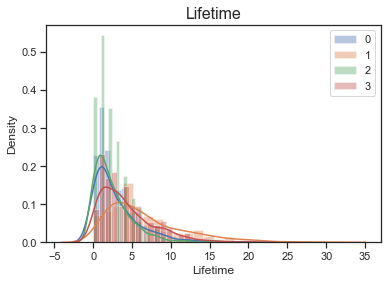

<AxesSubplot:xlabel='Avg_class_frequency_current_month', ylabel='Density'>

<AxesSubplot:xlabel='Avg_class_frequency_current_month', ylabel='Density'>

<AxesSubplot:xlabel='Avg_class_frequency_current_month', ylabel='Density'>

<AxesSubplot:xlabel='Avg_class_frequency_current_month', ylabel='Density'>

Text(0.5, 1.0, 'Avg_class_frequency_current_month')

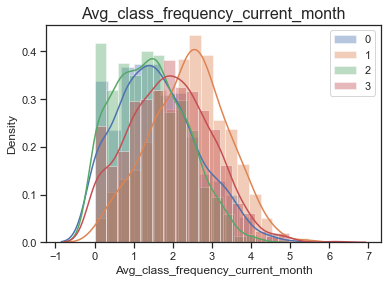

<AxesSubplot:xlabel='id', ylabel='Density'>

<AxesSubplot:xlabel='id', ylabel='Density'>

<AxesSubplot:xlabel='id', ylabel='Density'>

<AxesSubplot:xlabel='id', ylabel='Density'>

Text(0.5, 1.0, 'id')

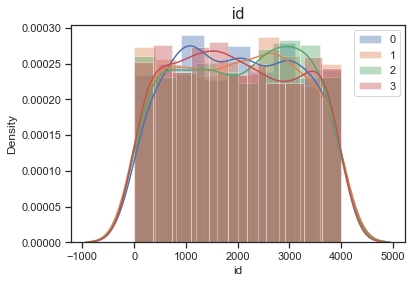

<AxesSubplot:xlabel='cluster_num', ylabel='Density'>

<AxesSubplot:xlabel='cluster_num', ylabel='Density'>

<AxesSubplot:xlabel='cluster_num', ylabel='Density'>

<AxesSubplot:xlabel='cluster_num', ylabel='Density'>

Text(0.5, 1.0, 'cluster_num')

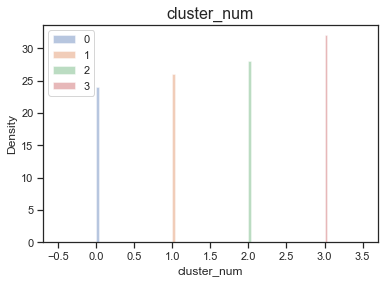

In [51]:
for col in gym_churn_new.drop('Churn',  axis = 1).columns:
    for i in range(0, 4):
        gym_churn_n = gym_churn_new.loc[gym_churn_new['cluster_num'] == i]
        sns.distplot(gym_churn_n[col], label = i,)
    plt.title(col, fontsize = 16)
    plt.legend()
    plt.show()    

**This plot shows us what we cee before in this question just all in one place**

**Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?**

In [52]:
gym_churn_groups = gym_churn_new.groupby(['cluster_num'])['Churn'].mean()
gym_churn_groups

cluster_num
0    0.403941
1    0.005540
2    0.416244
3    0.122021
4    0.426683
Name: Churn, dtype: float64

**Total churnrate:**

In [53]:
gym_churn_groups = gym_churn_new.groupby(['cluster_num'])['Churn'].mean().sum()/5
gym_churn_groups

0.27488567447782886

**Cluster 1 is almost not likly to churn**
<br>
**Total churn rate is 27,7%**

**Step 5. Come up with conclusions and basic recommendations on working with customers**
<br>
Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
<br>
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

**The clusters with high chance of churn: cluster 4 then 2 and 0** 
<br>
<br>
**The clusters with low chance of churn: cluster 1 then 2**


**1. Save the 'ID' ore 'Serial number' of user**
<br>
**2. Start collect data for time of 'subscription' ,'time of churn'.**
<br>
**3. We should advertise more to peaple who live far evey from our gym(maybe additional discount)**
<br>
**4. We should encourege customers to be more active on the gym(by more sports food, merchandise)**
<br>
**Castumers from clusters 4, 2 and 0 have high chance to churn next month. So we recommend perform the actions described in the lines above**